El notebook tiene como objetivo mostrar ejemplos de aplicacion del metodo GridSearch con validacion cruzada (CV) para la seleccion de los parametros/hiperparametros/modelos que debe ser usado segun el conjunto de datos a usar.

In [2]:
## Conjunto de librerias a usar

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias


## fin

In [2]:
# Cargar conjunto de datos

cancer = load_breast_cancer()

# dividir datos en train-test
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

# fin

In [6]:
# ver dimension de los datos cargados y divididos

print(cancer.data.shape)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0]/cancer.data.shape[0])

(569, 30)
(426, 30)
(143, 30)
0.7486818980667839


In [35]:
# Definir Pipeline (tuberia de pasos a aplicar en forma secuencial)

# definir tuberia
pipe = Pipeline([('preprocessing',StandardScaler()),('classifier',SVC())])

# definir grilla de parametros a evaluar (GridSearch)
param_grid = [{'classifier':[SVC()],'preprocessing':[StandardScaler(),None],
              'classifier__gamma':[0.001,0.01,0.1,1,10,100],
              'classifier__C':[0.001,0.01,0.1,1,10,100]},
             {'classifier':[RandomForestClassifier(n_estimators=100)],
             'preprocessing':[None],'classifier__max_features':[1,2,3]}]
# fin

In [39]:
# Crear conjuntos para validacion cruzada segun KFold

from sklearn.model_selection import KFold

# crea 10 conjuntos para el CV ... recordar que al aplicar esto, 9 grupos se usan para entrenar y 1 para testeo 
kfold = KFold(n_splits=10)

# Crear y entrenar segun Gridsearch 
grid1 = GridSearchCV(pipe,param_grid,cv=kfold)
grid1.fit(X_train,y_train)

# grid1.predict(X_test) ### predecir el y
# grid1.best_params_
# grid1.score(X_test,y_test)

# Ver el mejor modelo obtenido del GridSearch y su indicador de rendimiento
grid1.score(X_test,y_test)

0.9790209790209791

In [37]:
# Crear conjuntos para validacion cruzada segun Shufflesplit

from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5,n_splits=10)

grid2 = GridSearchCV(pipe,param_grid,cv=shuffle_split)
grid2.fit(X_train,y_train)

# grid2.predict(X_test) ### predecir el y
# grid2.best_params_
# grid2.score(X_test,y_test)
# grid2.best_score_
grid2.score(X_test,y_test)

0.986013986013986

In [29]:
# Imprimir indicadores o parametros del GridSearch obtenido

print('Best params:\n{}\n'.format(grid.best_params_))
print('Best cross-validation score: {:.5f}'.format(grid.best_score_))
print('Test set score: {:.5f}'.format(grid.score(X_test,y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.98588
Test set score: 0.97902


In [21]:
# Ver cuales son las llaves del diccionario con el mejor parametro ... solo es exploratorio
grid.best_params_.keys()

dict_keys(['classifier', 'classifier__C', 'classifier__gamma', 'preprocessing'])

In [24]:
# El grid se puede usar como un modelo mediante el llamado de su metodo "predict" .. automaticamente usa el mejor modelo
grid.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [25]:
# Ver el valor de los valores deseados "y" para contrastar
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [28]:
# Calcular de forma manual la precision de la prediccion

sum(y_test == grid.predict(X_test))/len(y_test)

0.9790209790209791

Resultadores de la Rejilla de Busqueda (GridSearch)

In [34]:
# ver los resultados del gridsearch en una tabla (dataframe)

resultados = pd.DataFrame(grid.cv_results_)
display(resultados)

,mean_fit_time,mean_score_time,mean_test_score,param_classifier,param_classifier__C,param_classifier__gamma,param_classifier__max_features,param_preprocessing,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.005795,0.001179,0.626758,"SVC(C=10, gamma=0.01)",0.001,0.001,NaN,StandardScaler(),"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.002142,0.000408,0.004593
1,0.004390,0.001000,0.626758,"SVC(C=10, gamma=0.01)",0.001,0.001,NaN,None,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.002240,0.000630,0.004593
2,0.003124,0.000000,0.626758,"SVC(C=10, gamma=0.01)",0.001,0.01,NaN,StandardScaler(),"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.006248,0.000000,0.004593
3,0.006249,0.003121,0.626758,"SVC(C=10, gamma=0.01)",0.001,0.01,NaN,None,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.007653,0.006242,0.004593
4,0.003124,0.003125,0.626758,"SVC(C=10, gamma=0.01)",0.001,0.1,NaN,StandardScaler(),"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.006249,0.006249,0.004593
5,0.006258,0.003118,0.626758,"SVC(C=10, gamma=0.01)",0.001,0.1,NaN,None,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.007664,0.006236,0.004593
6,0.008314,0.000808,0.626758,"SVC(C=10, gamma=0.01)",0.001,1,NaN,StandardScaler(),"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.006378,0.000762,0.004593
7,0.009375,0.002394,0.626758,"SVC(C=10, gamma=0.01)",0.001,1,NaN,None,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.000489,0.000489,0.004593
8,0.006582,0.001197,0.626758,"SVC(C=10, gamma=0.01)",0.001,10,NaN,StandardScaler(),"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.000489,0.000400,0.004593
9,0.009176,0.002194,0.626758,"SVC(C=10, gamma=0.01)",0.001,10,NaN,None,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",24,0.627907,0.635294,0.623529,0.623529,0.623529,0.000399,0.000399,0.004593


Ver indicadores del modelo de clasificacion

In [40]:
# matriz de confusion

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,grid2.predict(X_test))
print('Matriz de confusion:\n{}'.format(confusion))

Matriz de confusion:
[[52  1]
 [ 1 89]]


Reporte de Clasificacion - Matriz de confusion y metricas del clasificador

In [41]:
# reporte de la clasificacion

from sklearn.metrics import classification_report

print(classification_report(y_test,grid2.predict(X_test),target_names=['Positivo','Negativo']))

              precision    recall  f1-score   support

    Positivo       0.98      0.98      0.98        53
    Negativo       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Curva ROC y valor AUC (Area bajo curva ROC)

AUC calculado: 0.9981


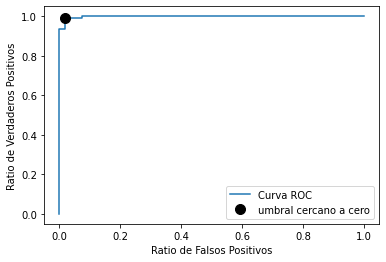

In [45]:
# Curvas ROC y valor AUC 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,umbrales = roc_curve(y_test,grid2.decision_function(X_test))
plt.plot(fpr,tpr,label='Curva ROC')
plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Positivos')

# hallar el umbral mas cercano a cero
u_cero = np.argmin(np.abs(umbrales))
plt.plot(fpr[u_cero],tpr[u_cero],'o',markersize=10,label='umbral cercano a cero',c='k')
plt.legend(loc='best')

auc = roc_auc_score(y_test, grid2.decision_function(X_test))
print('AUC calculado: {:.4f}'.format(auc))

# fin

Ejemplo multi-salida de clasificacion

In [54]:
# Ejemplo de modelo multi-salida de clasificacion

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Cargar datos
digits = load_digits()
## y = digits.target == 9 ## en caso se requiera clasificacion binaria "Es 9 / No es 9"
## reemplazar digits.target por y

# Dividir conjunto de datos en train y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(digits.data, digits.target, random_state=0)

# crear conjunto para validacion cruazada (CV) usando KFold
kfold = KFold(n_splits=5,shuffle=True, random_state=0)

# Modelo de regresion con aplicacion de validacion cruzada (CV)
logreg = LogisticRegression()
puntajes = cross_val_score(logreg,X_train2,y_train2,cv=kfold)
print('Cross validation scores: {}'.format(puntajes))
print('Valor medio de CV: {}'.format(puntajes.mean()))

# Modelo de regresion logistica (clasificacion)
modelo = LogisticRegression().fit(X_train2,y_train2)
predicho = modelo.predict(X_test2)

# imprimir indicadores
print('Accurary: {:.4f}'.format(accuracy_score(y_test2,predicho)))
print('Matriz de confusion:\n{}'.format(confusion_matrix(y_test2,predicho)))

# fin

Cross validation scores: [0.97407407 0.95925926 0.97769517 0.95539033 0.9739777 ]
Valor medio de CV: 0.9680793060718711
Accurary: 0.9511
Matriz de confusion:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


In [55]:
# mostrar principales indicadores de clasificacion segun cada salida

print(classification_report(y_test2,predicho))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

